In [1]:
import pandas as pd

In [18]:
data = [
    ["2차전지(생산)", "SK이노베이션", 10.19, 1.29],
    ["해운", "팬오션", 21.23, 0.95],
    ["시스템반도체", "티엘아이", 35.97, 1.12],
    ["해운", "HMM", 21.52, 3.20],
    ["시스템반도체", "아이에이", 37.32, 3.55],
    ["2차전지(생산)", "LG화학", 83.06, 3.75]
]
columns = ["테마", "종목명", "PER", "PBR"]
df = pd.DataFrame(data=data, columns=columns)
df


,테마,종목명,PER,PBR
0,2차전지(생산),SK이노베이션,10.19,1.29
1,해운,팬오션,21.23,0.95
2,시스템반도체,티엘아이,35.97,1.12
3,해운,HMM,21.52,3.20
4,시스템반도체,아이에이,37.32,3.55
5,2차전지(생산),LG화학,83.06,3.75


In [22]:
df.rename(columns = {'종목명' : 'number'}, inplace = True)
df = df.set_index('number')
df

,테마,PER,PBR
number,,,
SK이노베이션,2차전지(생산),10.19,1.29
팬오션,해운,21.23,0.95
티엘아이,시스템반도체,35.97,1.12
HMM,해운,21.52,3.20
아이에이,시스템반도체,37.32,3.55
LG화학,2차전지(생산),83.06,3.75


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, SK이노베이션 to LG화학
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   테마      6 non-null      object 
 1   PER     6 non-null      float64
 2   PBR     6 non-null      float64
dtypes: float64(2), object(1)
memory usage: 192.0+ bytes


In [25]:
df.describe()

,PER,PBR
count,6.000000,6.000000
mean,34.881667,2.310000
std,25.701604,1.319803
min,10.190000,0.950000
25%,21.302500,1.162500
50%,28.745000,2.245000
75%,36.982500,3.462500
max,83.060000,3.750000


NameError: name 'inner' is not defined

In [48]:
df_name = pd.DataFrame({
    '종목코드': [95570, 68400, 27410, 282330, 138930, 1460],
    '회사이름': ['AJ네트웍스', 'SK렌터카', 'AK홀딩스', 'BGF리테일', 'BNK금융지주', 'BYC']
}, columns=['종목코드', '회사이름'])

df_money = pd.DataFrame({
    '회사코드': [95570, 68400, 6840, 27410, 138930, 1460],
    '종가': [20000, 24000, 15000, 5000, 100000, 30000]
}, columns=['회사코드', '종가'])
print('df_name데이터 \n',df_name,'\n')
print('df_money데이터 \n',df_money)

df_name데이터 
      종목코드     회사이름
0   95570   AJ네트웍스
1   68400    SK렌터카
2   27410    AK홀딩스
3  282330   BGF리테일
4  138930  BNK금융지주
5    1460      BYC 

df_money데이터 
      회사코드      종가
0   95570   20000
1   68400   24000
2    6840   15000
3   27410    5000
4  138930  100000
5    1460   30000


In [41]:
df_money.rename(columns = {'회사코드' : '종목코드'}, inplace=True)
df_money

,종목코드,종가
0,95570,20000
1,68400,24000
2,6840,15000
3,27410,5000
4,138930,100000
5,1460,30000


In [43]:
pd.merge(df_name, df_money, how = 'inner', on = '종목코드')

,종목코드,회사이름,종가
0,95570,AJ네트웍스,20000
1,68400,SK렌터카,24000
2,27410,AK홀딩스,5000
3,138930,BNK금융지주,100000
4,1460,BYC,30000


In [51]:
a = pd.merge(df_name, df_money, how = 'outer', left_on = '종목코드', right_on = '회사코드')
# a.drop('회사코드', axis = 1, inplace= True)
a
# print(pd.merge(df_name, df_money, how = 'inner'))
# print(pd.merge(df_name, df_money, how = "outer" ))
# print(pd.merge(df_name, df_money, how = 'left' ))
# print(pd.merge(df_name, df_money, how = 'right' ))

,종목코드,회사이름,회사코드,종가
0,95570.0,AJ네트웍스,95570.0,20000.0
1,68400.0,SK렌터카,68400.0,24000.0
2,27410.0,AK홀딩스,27410.0,5000.0
3,282330.0,BGF리테일,NaN,NaN
4,138930.0,BNK금융지주,138930.0,100000.0
5,1460.0,BYC,1460.0,30000.0
6,NaN,NaN,6840.0,15000.0


In [ ]:
korea_data.fillna({'확진자' : korea_data['확진자'].mean()})

In [2]:
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
drink_df = pd.read_csv(url, ',')

C:\Users\spaceastonomy\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3251: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
drink_df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [9]:
col = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drink_df[col].corr(method='pearson')

In [10]:
corr_column_names = ['beer', 'spirit', 'wine', 'alcoho']

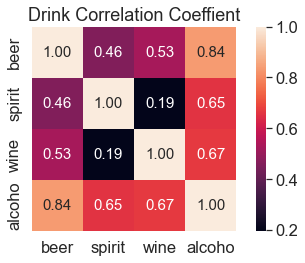

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                 cbar = True,
                 annot = True,
                 square = True,
                 fmt = '.2f',
                 annot_kws={'size' : 15},
                 yticklabels=corr_column_names,
                 xticklabels=corr_column_names
                 )
plt.title('Drink Correlation Coeffient')
plt.tight_layout()
plt.show()

In [ ]:
sns.set(style = 'whitegrid')
sns.pairplot(drink_df[[]])

### 실습
- 참고 스크래핑을 많이 할 시(반복문)에는 time.sleep(1)을 주어 아이피 차단 당하지 않도록 주의한다.
- KRX 스크래핑을 활용하여 2020년 4월 20일에 KOSPI 시장의 티커를 받아오기.



In [ ]:
tickers = stock.get_market_ticker_list('20200401', market= )
tickers = tickers

In [13]:
from pykrx import stock
from pykrx import bond
import pandas as pd

tickers = stock.get_market_ticker_list('20200401', market='KOSPI')
tickers = tickers[10:20]
tickers

['000120',
 '011150',
 '011155',
 '001045',
 '097950',
 '097955',
 '000590',
 '012030',
 '016610',
 '005830']

In [ ]:
1. 티커 중 앞에서 10번째부터 20번째까지 티커 ticker 저장하기
tickers = tickers[10:20]

In [21]:
df_ohlcv = pd.DataFrame()


SyntaxError: invalid syntax (2583771618.py, line 2)

In [1]:
df = pd.DataFrame()
for i in tickers:
    df_1  = stock.get_market_fundamental('20200401', '20200430', i)
    df_1['종목코드'] = i
    df = pd.concat([df_1, df], axis = 0)
df
    
    
    

NameError: name 'pd' is not defined

In [22]:
# 2. ticker-> 2020년 4월 (시가/고가/저가/종가/거래량)정보 받아와 df_ohlcv 저장하기 (칼럼은 날짜/시가/고가/저가/종가/거래량/티커)

df_ohlcv = pd.DataFrame()
for i in tickers:
    df = stock.get_market_ohlcv('20200401', '20200430', i)
    df['종목코드'] = i 
    df_ohlcv = pd.concat([df_ohlcv, df], axis = 0)
    # print(df_ohlcv)
df_ohlcv

,시가,고가,저가,종가,거래량,종목코드
날짜,,,,,,
2020-04-01,135500,136000,128000,128000,72016,000120
2020-04-02,129000,133000,126000,131000,68311,000120
2020-04-03,130000,130500,125500,127000,105709,000120
2020-04-06,128500,131500,127500,131500,74357,000120
2020-04-07,133000,136000,131500,135000,93191,000120
...,...,...,...,...,...,...
2020-04-23,40900,43600,40900,43100,346294,005830
2020-04-24,43900,44350,42000,42500,245584,005830
2020-04-27,43100,45400,42900,45100,262434,005830


In [ ]:
df_f = pd.DataFrame()
for i in tickers:
    df = stock.get_market_fundamental('20200401', '20200430', i)
    df['fundamental'] = i 
    df_f = pd.concat([df_f, df], axic = 0)
    df_f.drop(['EPS', 'DIV', 'DPS'], axis = 1, inplace =True)
    

df_f = pd.DataFrame()
for i in tickers:
    df = stock.get_market_fundamental("", i)
    df['fundamental'] = i
    df_f = pd.concat([df_f, df], axis = 0)

In [ ]:
3. ticker-> 2020년 4월 20일 (PER/EPS/PBR)정보 받아와 df_fundamental 저장하기 (칼럼 PER/EPS/PBR/티커)

df_f = pd.DataFrame()
for i in tickers:
    df = stock.get_market_fundamental("20200401", "20200430", i)
    
    df['fundamental'] = i
    df_f = pd.concat([df_f, df], axis=0)
    df_f.drop(['EPS', 'DIV', 'DPS'], axis=1, inplace=True)
df_f   


In [ ]:
for i in tickers:
    plt.plot(df_ohlcv[df_ohlcv['종목코드'] == i].index, df_ohlcv[df_ohlcv['종목코드'] == i]['종가'])

In [ ]:
4. df_fundamental에서 각 종목별로 그래프 그려보기
for i in tickers:
    plt.plot(df_ohlcv[df_ohlcv['종목코드'] == i].index, df_ohlcv[df_ohlcv['종목코드'] == i] ['종가'])
    plt.show()

In [ ]:
5. get_market_trading_volume_by_date을 활용하여 거래 실적 중 (4월 한달) 연기금 데이터  받아오고 df_purchases_of_equities에 저장
df_purchases_of_equities = stock.get_market_trading_volume_by_date("20200401", "20200430", "KOSPI", etf=True, etn=True, elw=True, detail=True)



In [ ]:
6. df_purchases_of_equities의 칼럼을 ['연기금','외국인','은행'] 저장하기
df_purchases_of_equities = df_purchases_of_equities[['연기금', '은행', '외국인']]

In [ ]:
df = stock.get_index_ohlcv('20200401', '20200430', '1028')
df = df[['종가']]

In [ ]:
7. 코스피 200 ohlcv 받아와 종가 컬럼만 df에 저장
df = stock.get_index_ohlcv("20200401", "20200430", "1028")
df = df[['종가']]
df_last =  pd.concat([df_f, df], axis=0)

In [ ]:
8. df와 df_purchases_of_equities를 df_last합치기
df_last = pd.concat([df, df_purchases_of_equities], axis=1)
df_last

In [ ]:
9. 히트맵 그려보기


In [ ]:
10. 한 곳에 두개 그래프 겹쳐서 그려보기 (종가, 외국인) (양쪽에 y 범위나오게)


In [ ]:
11. minmax 보기


In [ ]:
12. df_last 에서 연금 칼럼 내림차순으로 정렬 해보기
df_last.sort_values(['연기금'], ascending = False)

In [ ]:
13. 화살표 그리는 것 보기


In [ ]:
14. csv 파일로 저장해 보기 , 불러와 보기

In [41]:
import pandas as pd
df=pd.read_csv('./COVID-19_Korean (1).csv') # colab 용
# df=pd.read_csv('./datasets/COVID-19_Korean (1).csv') # jupyter notebook 용
df.head()

,행정구역,국가/지역,위도,경도,날짜,확진자,사망자,회복자
0,안후이성,중국,31.8257,117.2264,2020-01-22,1,0,0
1,베이징시,중국,40.1824,116.4142,2020-01-22,14,0,0
2,충칭시,중국,30.0572,107.8740,2020-01-22,6,0,0
3,푸젠성,중국,26.0789,117.9874,2020-01-22,1,0,0
4,간쑤성,중국,36.0611,103.8343,2020-01-22,0,0,0


In [ ]:
df[df['행정구역'] == '안후이성']
df[df['위도'] == '36']
df[df['경도'] == '128']
df[df['날짜'] == '2020-01-22']
df[df['확진자'] == 1]
df[df['사망자'] == ]
df[df['회복자'] == ]

In [48]:
korea_data = df[df['국가/지역'] == '대한민국']
korea_data

,행정구역,국가/지역,위도,경도,날짜,확진자,사망자,회복자
33,NaN,대한민국,36.0,128.0,2020-01-22,1,0,0
193,NaN,대한민국,36.0,128.0,2020-01-23,1,0,0
353,NaN,대한민국,36.0,128.0,2020-01-24,2,0,0
513,NaN,대한민국,36.0,128.0,2020-01-25,2,0,0
673,NaN,대한민국,36.0,128.0,2020-01-26,3,0,0
833,NaN,대한민국,36.0,128.0,2020-01-27,4,0,0
993,NaN,대한민국,36.0,128.0,2020-01-28,4,0,0
1153,NaN,대한민국,36.0,128.0,2020-01-29,4,0,0
1313,NaN,대한민국,36.0,128.0,2020-01-30,4,0,0
1473,NaN,대한민국,36.0,128.0,2020-01-31,11,0,0


In [13]:
# reset_index함수를 사용하여 행 인덱스 재설정
korea_data=korea_data.reset_index(drop=True)

# 예제 데이터 수정
korea_data.iloc[[0],0]='서울'
korea_data.loc[3]=None
korea_data.iloc[3,[6,7]]=0
korea_data.loc[3,'사망자']=None
korea_data.loc[4]=None

In [51]:
korea_data = korea_data.reset_index(drop = True)

korea_data.iloc[:, 0] = '서울'
korea_data.loc[3] = None
korea_data.iloc[3, [6,7]] = 0
korea_data.loc[3, '사망자'] = None
korea_data.loc[4] = None
korea_data

,행정구역,국가/지역,위도,경도,날짜,확진자,사망자,회복자
0,서울,대한민국,36.0,128.0,2020-01-22,1.0,0.0,0.0
1,서울,대한민국,36.0,128.0,2020-01-23,1.0,0.0,0.0
2,서울,대한민국,36.0,128.0,2020-01-24,2.0,0.0,0.0
3,None,None,NaN,NaN,None,NaN,NaN,0.0
4,None,None,NaN,NaN,None,NaN,NaN,NaN
5,서울,대한민국,36.0,128.0,2020-01-27,4.0,0.0,0.0
6,서울,대한민국,36.0,128.0,2020-01-28,4.0,0.0,0.0
7,서울,대한민국,36.0,128.0,2020-01-29,4.0,0.0,0.0
8,서울,대한민국,36.0,128.0,2020-01-30,4.0,0.0,0.0
9,서울,대한민국,36.0,128.0,2020-01-31,11.0,0.0,0.0


In [53]:
import numpy as np
korea_data.iloc[1, 0] = np.nan
korea_data.iloc[2, 0] = pd.NaT
korea_data

,행정구역,국가/지역,위도,경도,날짜,확진자,사망자,회복자
0,서울,대한민국,36.0,128.0,2020-01-22,1.0,0.0,0.0
1,NaN,대한민국,36.0,128.0,2020-01-23,1.0,0.0,0.0
2,NaT,대한민국,36.0,128.0,2020-01-24,2.0,0.0,0.0
3,None,None,NaN,NaN,None,NaN,NaN,0.0
4,None,None,NaN,NaN,None,NaN,NaN,NaN
5,서울,대한민국,36.0,128.0,2020-01-27,4.0,0.0,0.0
6,서울,대한민국,36.0,128.0,2020-01-28,4.0,0.0,0.0
7,서울,대한민국,36.0,128.0,2020-01-29,4.0,0.0,0.0
8,서울,대한민국,36.0,128.0,2020-01-30,4.0,0.0,0.0
9,서울,대한민국,36.0,128.0,2020-01-31,11.0,0.0,0.0


In [55]:
korea_data.dropna()

,행정구역,국가/지역,위도,경도,날짜,확진자,사망자,회복자
0,서울,대한민국,36.0,128.0,2020-01-22,1.0,0.0,0.0
5,서울,대한민국,36.0,128.0,2020-01-27,4.0,0.0,0.0
6,서울,대한민국,36.0,128.0,2020-01-28,4.0,0.0,0.0
7,서울,대한민국,36.0,128.0,2020-01-29,4.0,0.0,0.0
8,서울,대한민국,36.0,128.0,2020-01-30,4.0,0.0,0.0
9,서울,대한민국,36.0,128.0,2020-01-31,11.0,0.0,0.0
10,서울,대한민국,36.0,128.0,2020-02-01,12.0,0.0,0.0
11,서울,대한민국,36.0,128.0,2020-02-02,15.0,0.0,0.0
12,서울,대한민국,36.0,128.0,2020-02-03,15.0,0.0,0.0
13,서울,대한민국,36.0,128.0,2020-02-04,16.0,0.0,0.0


In [ ]:
korea_data.fillna({'확진자' : korea_data['확진자'].mean()})